# iotSDR Direct IQ samples FFT to Processor Memmory  Notebook:


## Setting up the environment:

* import required python modules



In [1]:
from pynq import Overlay
import iotSDR_GPS_streamer as iotSDR_GPS_streamer
import max2769_driver as max2769_driver

import fftpl
import time
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
overlay = Overlay('../bitstream/iotSDR_GPS_Receiver.bit', download=True)
if not overlay.is_loaded():
    overlay.download()
    print("Bitfile now Loaded")
    
#overlay.ip_dict


In [4]:
FFT_LENGTH = 1 << 15 # 32k
fftpl = fftpl.FFTPL(overlay,FFT_LENGTH) 

In [5]:
wordsPerBlk    = 32*1024
gps_chip = max2769_driver.MAX2769()
#gps_chip.gps_4096IF_config()

gps_pl   = iotSDR_GPS_streamer.GPS_RX_Streaming(wordsPerBlk,overlay=overlay)



GPS chip is configured for IF=0MHz @ 4.096MSPS


In [6]:
#gps_pl.fifo_flush()
gps_pl.enable_rf_stream(1)
gps_pl.set_blk_size(wordsPerBlk)
gps_pl.select_iq_for_fft(1)
gps_pl.enable_iq_stream(0)
gps_pl.fifo_reset()

reset 0x81008000


In [7]:
def get_fft_blk(FFT_LENGTH):
    fftpl.fft_config_update(True)
    sig_fft_frd = fftpl.fft_iq_samples()
    sig_fft_frd = fftpl.deinterleave_iq(sig_fft_frd)

    print("spectrum ", sig_fft_frd)
    plt.plot(np.abs(sig_fft_frd))
    
    fs = 8*4096.0 # Hz
    t = np.arange(0.0, 1.0, 1/fs)

    plt.plot(t, sig_fft_frd.real)
    plt.xlabel("Time (sec)")
    plt.ylabel("iq samples fft result")

In [8]:
import threading
"""Threads for gathering dma block of samples from FFT in the background """
#fft_fetch  = threading.Thread(target=get_fft_blk,args =(FFT_LENGTH,))

try:
    fft_fetch  = threading.Thread(target=get_fft_blk,args =(FFT_LENGTH,))

except:
    #if fft_fetch.is_alive():
    print('Already thread running')


In [9]:
fft_fetch.start()

0x6aaa


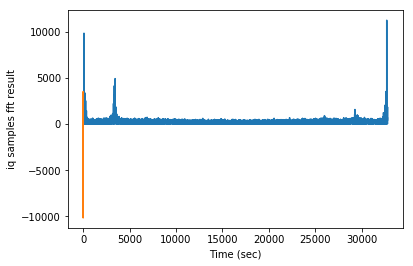

In [11]:
gps_pl.enable_iq_stream(1)